# sklearn 机器学习包

***sklearn*** 的全称叫 Scikit-learn，它给我们提供了 3 个朴素贝叶斯分类算法，分别是```高斯朴素贝叶斯（GaussianNB）```、```多项式朴素贝叶斯（MultinomialNB）```和```伯努利朴素贝叶斯（BernoulliNB）```。

这三种算法适合应用在不同的场景下，我们应该根据特征变量的不同选择不同的算法：

* 高斯朴素贝叶斯：特征变量是连续变量，符合高斯分布，比如说人的身高，物体的长度。
* 多项式朴素贝叶斯：特征变量是离散变量，符合多项分布，在文档分类中特征变量体现在一个单词出现的次数，或者是单词的 TF-IDF 值等。
* 伯努利朴素贝叶斯：特征变量是布尔变量，符合 0/1 分布，在文档分类中特征是单词是否出现。

伯努利朴素贝叶斯是以文件为粒度，如果该单词在某文件中出现了即为 1，否则为 0。而多项式朴素贝叶斯是以单词为粒度，会计算在某个文件中的具体次数。而高斯朴素贝叶斯适合处理特征变量是连续变量，且符合正态分布（高斯分布）的情况。比如身高、体重这种自然界的现象就比较适合用高斯朴素贝叶斯来处理。而文本分类是使用多项式朴素贝叶斯或者伯努利朴素贝叶斯。

***什么是 TF-IDF 值呢？***

TF-IDF 是一个统计方法，用来评估某个词语对于一个文件集或文档库中的其中一份文件的重要程度。

TF-IDF 实际上是两个词组 Term Frequency 和 Inverse Document Frequency 的总称，两者缩写为 TF 和 IDF，分别代表了***词频***和***逆向文档频率***。
词频 TF 计算了一个单词在文档中出现的次数，它认为一个单词的重要性和它在文档中出现的次数呈正比。
* 逆向文档频率 IDF，是指一个单词在文档中的区分度。它认为一个单词出现在的文档数越少，就越能通过这个单词把该文档和其他文档区分开。IDF 越大就代表该单词的区分度越大。

TF-IDF 实际上是词频 TF 和逆向文档频率 IDF 的乘积。这样我们倾向于找到 TF 和 IDF 取值都高的单词作为区分，即这个单词在一个文档中出现的次数多，同时又很少出现在其他文档中。这样的单词适合用于分类。

***TF-IDF 如何计算***

首先我们看下词频 TF 和逆向文档概率 IDF 的公式。
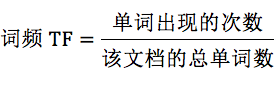

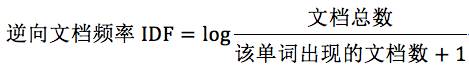
为什么 IDF 的分母中，单词出现的文档数要加 1 呢？因为有些单词可能不会存在文档中，为了避免分母为 0，统一给单词出现的文档数都加 1。

***TF-IDF=TF*IDF***
你可以看到，TF-IDF 值就是 TF 与 IDF 的乘积, 这样可以更准确地对文档进行分类。比如“我”这样的高频单词，虽然 TF 词频高，但是 IDF 值很低，整体的 TF-IDF 也不高。我在这里举个例子。假设一个文件夹里一共有 10 篇文档，其中一篇文档有 1000 个单词，“this”这个单词出现 20 次，“bayes”出现了 5 次。“this”在所有文档中均出现过，而“bayes”只在 2 篇文档中出现过。我们来计算一下这两个词语的 TF-IDF 值。针对“this”，计算 TF-IDF 值：

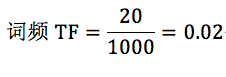

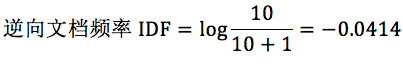

所以 TF-IDF=0.02*(-0.0414)=-8.28e-4。针对“bayes”，计算 TF-IDF 值：
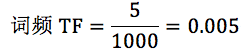

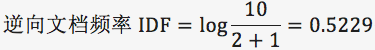

TF-IDF=0.005*0.5229=2.61e-3。

很明显“bayes”的 TF-IDF 值要大于“this”的 TF-IDF 值。这就说明用“bayes”这个单词做区分比单词“this”要好。

**如何求 TF-IDF**

在 sklearn 中我们直接使用 TfidfVectorizer 类，它可以帮我们计算单词 TF-IDF 向量的值。在这个类中，取 sklearn 计算的对数 log 时，底数是 e，不是 10。

下面我来讲下如何创建 TfidfVectorizer 类，创建 TfidfVectorizer 的方法是：

```TfidfVectorizer(stop_words=stop_words, token_pattern=token_pattern)```

我们在创建的时候，有两个构造参数，可以自定义停用词 stop_words 和规律规则 token_pattern。需要注意的是传递的数据结构，停用词 stop_words 是一个列表 List 类型，而过滤规则 token_pattern 是正则表达式。
什么是停用词？停用词就是在分类中没有用的词，这些词一般词频 TF 高，但是 IDF 很低，起不到分类的作用。为了节省空间和计算时间，我们把这些词作为停用词 stop words，告诉机器这些词不需要帮我计算。
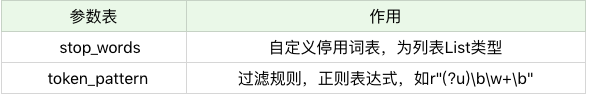

当我们创建好 TF-IDF 向量类型时，可以用 fit_transform 帮我们计算，返回给我们文本矩阵，该矩阵表示了每个单词在每个文档中的 TF-IDF 值。
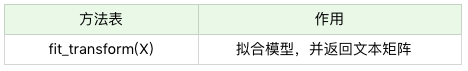

在我们进行 fit_transform 拟合模型后，我们可以得到更多的 TF-IDF 向量属性，比如，我们可以得到词汇的对应关系（字典类型）和向量的 IDF 值，当然也可以获取设置的停用词 stop_words。
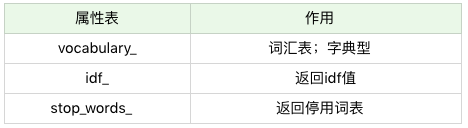

举个例子，假设我们有 4 个文档：

* 文档 1：this is the bayes document；
* 文档 2：this is the second second document；
* 文档 3：and the third one；
* 文档 4：is this the document。

现在想要计算文档里都有哪些单词，这些单词在不同文档中的 TF-IDF 值是多少呢？首先我们创建 TfidfVectorizer 类：

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()

然后我们创建 4 个文档的列表 documents，并让创建好的 tfidf_vec 对 documents 进行拟合，得到 TF-IDF 矩阵：

In [ ]:
documents = [
    'this is the bayes document',
    'this is the second second document',
    'and the third one',
    'is this the document'
]
tfidf_matrix = tfidf_vec.fit_transform(documents)
print(tfidf_matrix)

In [ ]:
# 输出文档中所有不重复的词：
print('不重复的词:', tfidf_vec.get_feature_names())

In [ ]:
# 输出每个单词对应的 id 值：
print('每个单词的ID:', tfidf_vec.vocabulary_)

In [ ]:
# 输出每个单词在每个文档中的 TF-IDF 值，向量里的顺序是按照词语的 id 顺序来的：
print('每个单词的tfidf值:', tfidf_matrix.toarray())


**如何对文档进行分类如果我们要对文档进行分类，有两个重要的阶段：（jupyter notebook会报错）**


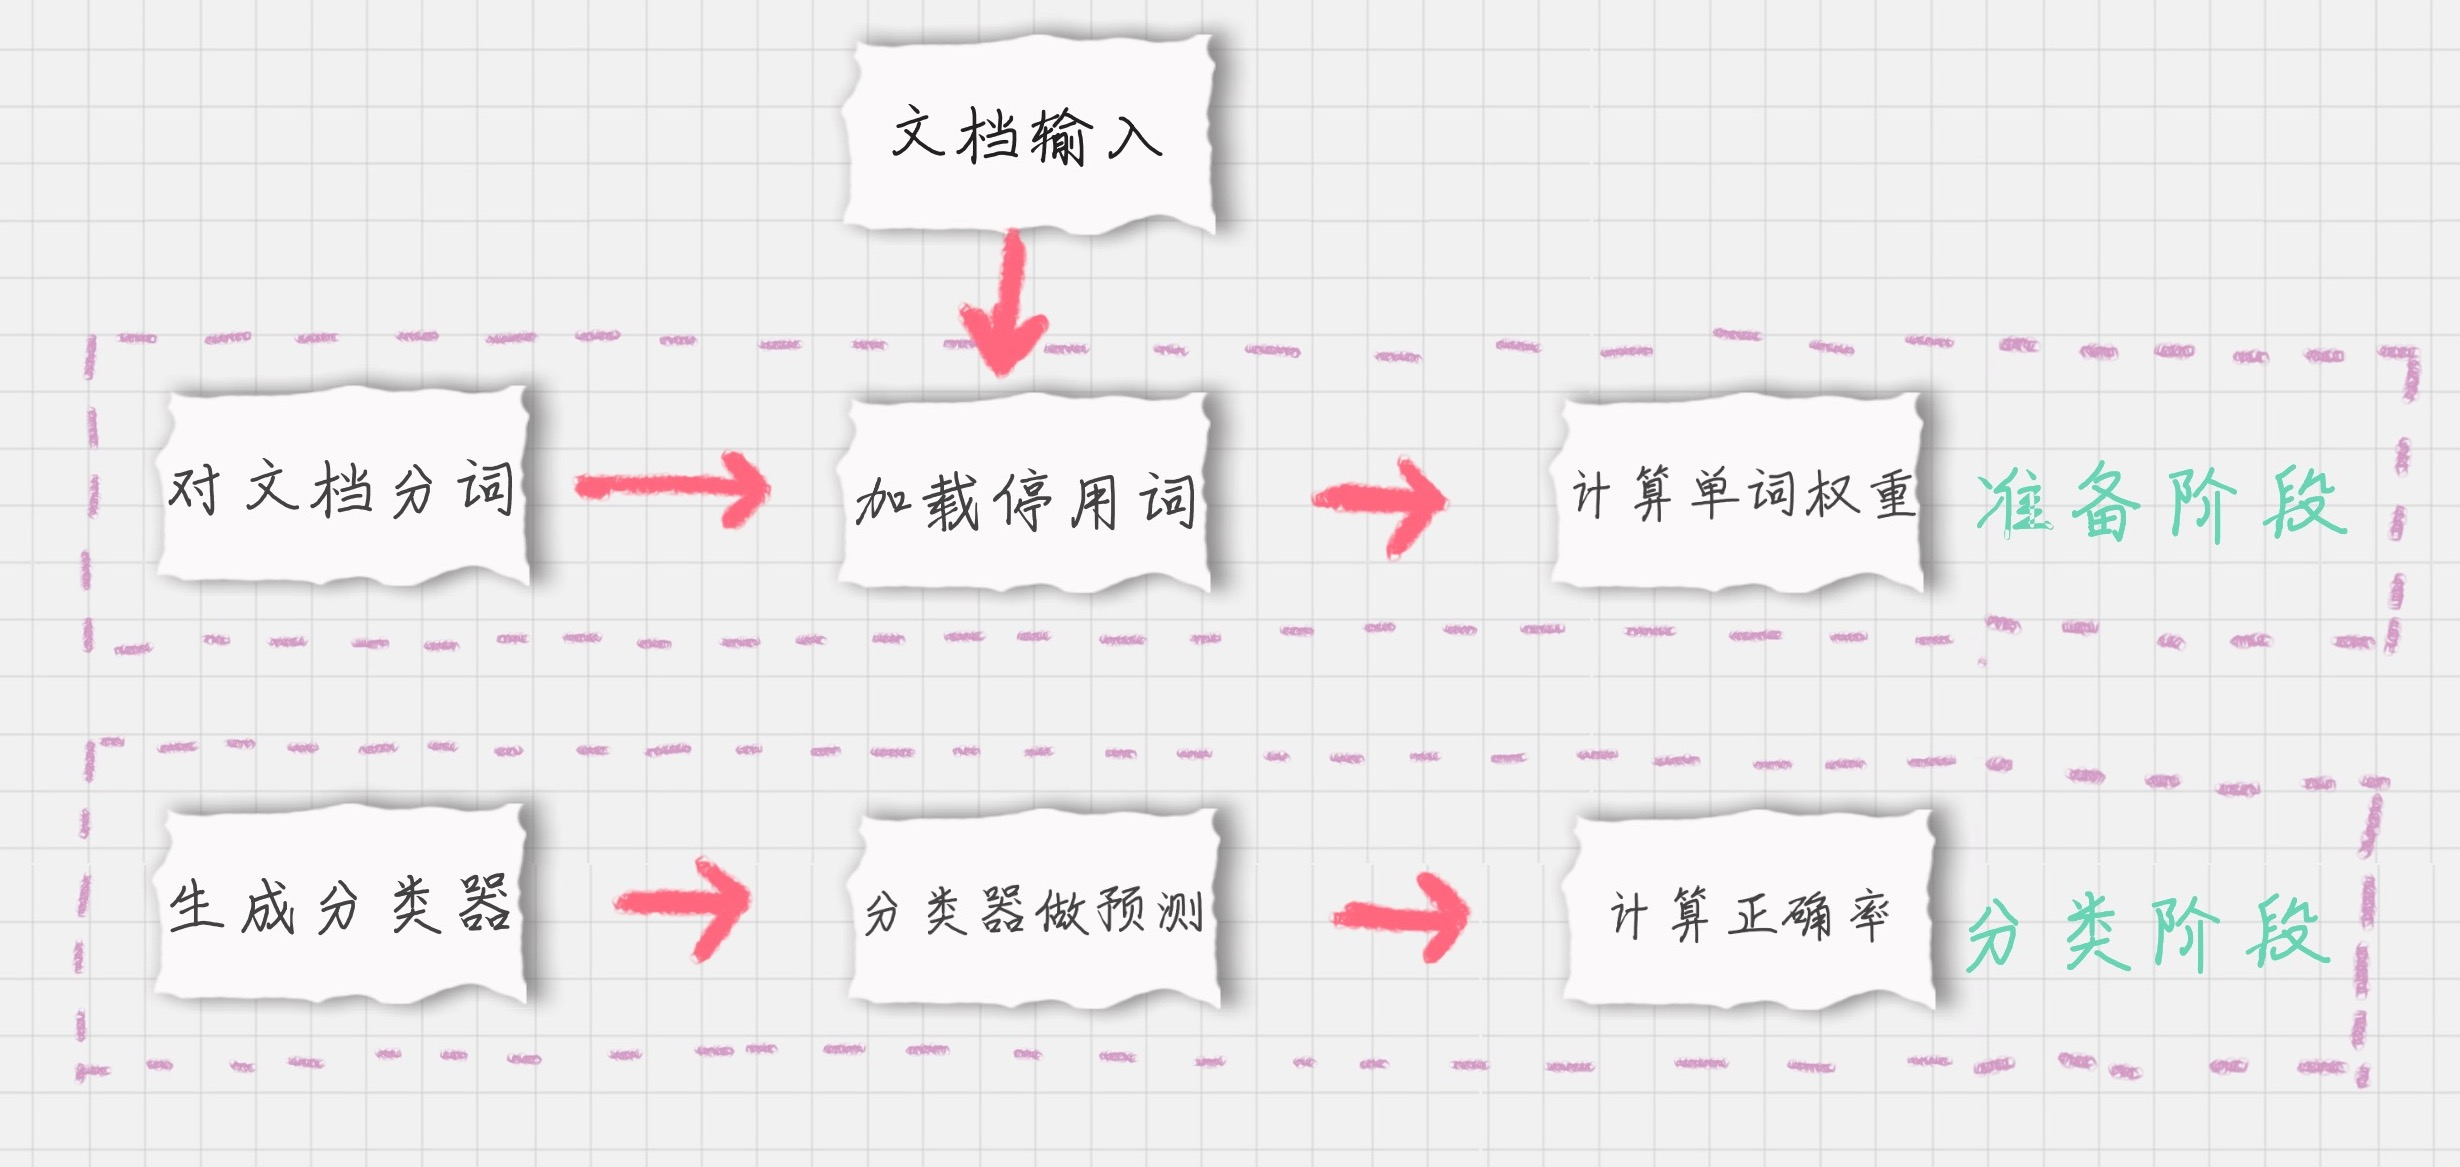

基于分词的数据准备，包括分词、单词权重计算、去掉停用词；

应用朴素贝叶斯分类进行分类，首先通过训练集得到朴素贝叶斯分类器，然后将分类器应用于测试集，并与实际结果做对比，最终得到测试集的分类准确率。

In [ ]:
import os
import jieba
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
warnings.filterwarnings('ignore')
import nltk
# nltk.download()

**准备阶段：**

***模块 1：***

    在准备阶段里，最重要的就是分词。那么如果给文档进行分词呢？英文文档和中文文档所使用的分词工具不同。在英文文档中，最常用的是 NTLK 包。NTLK 包中包含了英文的停用词 stop words、分词和标注方法。

In [ ]:
stop_words = open(r'./stop/stopword.txt', 'r', encoding='utf-8').read()
stop_words = stop_words.encode('utf-8').decode('utf-8-sig')  # 列表头部\ufeff处理
stop_words = stop_words.split('\n')  # 根据分隔符分隔
text = ''.join(stop_words)

word_list = nltk.word_tokenize(text) #分词
nltk.pos_tag(word_list) #标注单词的词性


In [ ]:
import nltk
word_list = nltk.word_tokenize(text) #分词
nltk.pos_tag(word_list) #标注单词的词性

在中文文档中，最常用的是 jieba 包。jieba 包中包含了中文的停用词 stop words 和分词方法。

In [ ]:
import jieba
word_list = jieba.cut (text) #中文分词
# print(word_list)

***模块 2：***

    加载停用词表我们需要自己读取停用词表文件，从网上可以找到中文常用的停用词保存在 stop_words.txt，然后利用 Python 的文件读取函数读取文件，保存在 stop_words 数组中。

In [ ]:
stop_words = [line.strip().decode('utf-8') for line in os.open('stop_words.txt', mode='r', encoding='utf-8').readlines()]

***模块 3：***
    
    计算单词的权重这里我们用到 sklearn 里的 TfidfVectorizer 类，上面我们介绍过它使用的方法。直接创建 TfidfVectorizer 类，然后使用 fit_transform 方法进行拟合，得到 TF-IDF 特征空间 features，你可以理解为选出来的分词就是特征。我们计算这些特征在文档上的特征向量，得到特征空间 features。

In [ ]:
tf = TfidfVectorizer(stop_words=stop_words, max_df=0.5)
features = tf.fit_transform(train_contents)
# 这里 max_df 参数用来描述单词在文档中的最高出现率。
# 假设 max_df=0.5，代表一个单词在 50% 的文档中都出现过了，那么它只携带了非常少的信息，因此就不作为分词统计。
# 一般很少设置 min_df，因为 min_df 通常都会很小。

***模块 4：生成朴素贝叶斯分类器***

    我们将特征训练集的特征空间 train_features，以及训练集对应的分类 train_labels 传递给贝叶斯分类器 clf，它会自动生成一个符合特征空间和对应分类的分类器。
    这里我们采用的是多项式贝叶斯分类器，其中 alpha 为平滑参数。为什么要使用平滑呢？因为如果一个单词在训练样本中没有出现，这个单词的概率就会被计算为 0。但训练集样本只是整体的抽样情况，我们不能因为一个事件没有观察到，就认为整个事件的概率为 0。为了解决这个问题，我们需要做平滑处理。
    当 alpha=1 时，使用的是 Laplace 平滑。Laplace 平滑就是采用加 1 的方式，来统计没有出现过的单词的概率。这样当训练样本很大的时候，加 1 得到的概率变化可以忽略不计，也同时避免了零概率的问题。当0<alpha<1时，使用的是 Lidstone 平滑。对于 Lidstone 平滑来说，alpha 越小，迭代次数越多，精度越高。我们可以设置 alpha 为 0.001。

In [ ]:
# 多项式贝叶斯分类器
clf = MultinomialNB(alpha=0.001).fit(train_features, train_labels)

***模块 5：使用生成的分类器做预测***

    首先我们需要得到测试集的特征矩阵。方法是用训练集的分词创建一个 TfidfVectorizer 类，使用同样的 stop_words 和 max_df，然后用这个 TfidfVectorizer 类对测试集的内容进行 fit_transform 拟合，得到测试集的特征矩阵 test_features。

In [ ]:
test_tf = TfidfVectorizer(stop_words=stop_words, max_df=0.5, vocabulary=train_vocabulary)
test_features=test_tf.fit_transform(test_contents)

    然后我们用训练好的分类器对新数据做预测。方法是使用 predict 函数，传入测试集的特征矩阵 test_features，得到分类结果 predicted_labels。predict 函数做的工作就是求解所有后验概率并找出最大的那个。

In [ ]:
predicted_labels=clf.predict(test_features)

***模块 6：计算准确率***

    计算准确率实际上是对分类模型的评估。我们可以调用 sklearn 中的 metrics 包，在 metrics 中提供了 accuracy_score 函数，方便我们对实际结果和预测的结果做对比，给出模型的准确率。

In [ ]:
print('准确率为：', metrics.accuracy_score(test_labels, predicted_labels))

***数据挖掘神器 sklearn***

从数据挖掘的流程来看，一般包括了获取数据、数据清洗、模型训练、模型评估和模型部署这几个过程。

sklearn 中包含了大量的数据挖掘算法，比如三种朴素贝叶斯算法，我们只需要了解不同算法的适用条件，以及创建时所需的参数，就可以用模型帮我们进行训练。在模型评估中，sklearn 提供了 metrics 包，帮我们对预测结果与实际结果进行评估。

在文档分类的项目中，我们针对文档的特点，给出了基于分词的准备流程。一般来说 NTLK 包适用于英文文档，而 jieba 适用于中文文档。我们可以根据文档选择不同的包，对文档提取分词。这些分词就是贝叶斯分类中最重要的特征属性。基于这些分词，我们得到分词的权重，即特征矩阵。
通过特征矩阵与分类结果，我们就可以创建出朴素贝叶斯分类器，然后用分类器进行预测，最后预测结果与实际结果做对比即可以得到分类器在测试集上的准确率。

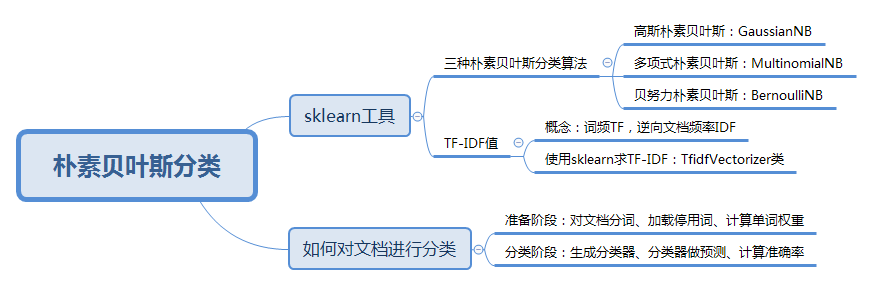

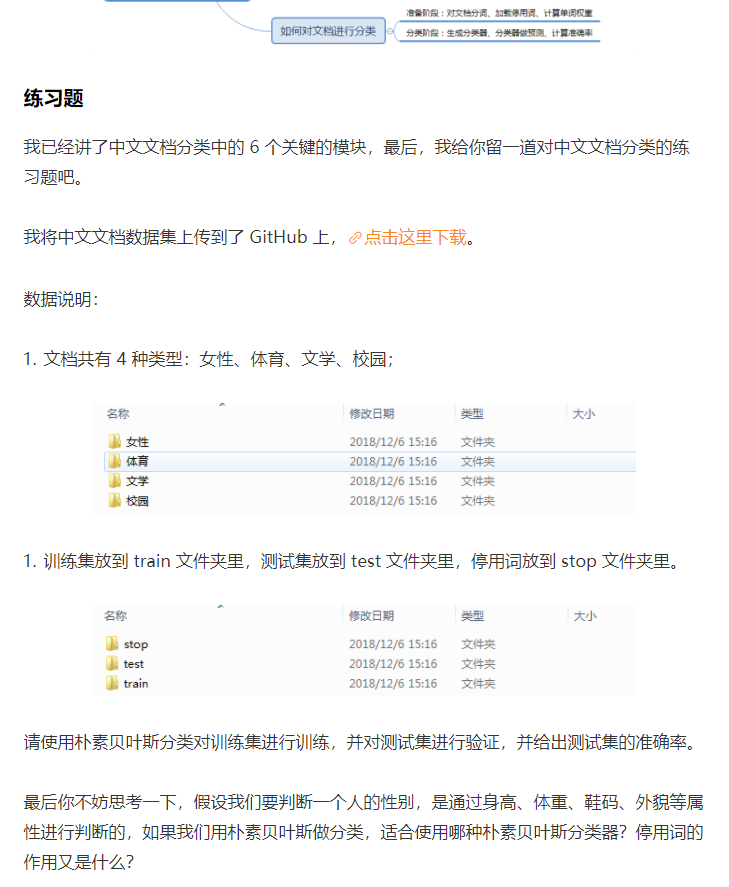

In [ ]:
import os
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

LABEL_MAP = {'体育': 0, '女性': 1, '文学': 2, '校园': 3}
# 加载停用词
with open('./stop/stopword.txt', 'rb') as f:
    STOP_WORDS = [line.strip() for line in f.readlines()]


def load_data(base_path):
    """
    :param base_path: 基础路径
    :return: 分词列表，标签列表
    """
    documents = []
    labels = []

    for root, dirs, files in os.walk(base_path): # 循环所有文件并进行分词打标
        for file in files:
            label = root.split('\\')[-1] # 因为windows上路径符号自动转成\了，所以要转义下
            labels.append(label)
            filename = os.path.join(root, file)
            with open(filename, 'rb') as f: # 因为字符集问题因此直接用二进制方式读取
                content = f.read()
                word_list = list(jieba.cut(content))
                words = [wl for wl in word_list]
                documents.append(' '.join(words))
    return documents, labels


def train_fun(td, tl, testd, testl):
    """
    构造模型并计算测试集准确率，字数限制变量名简写
    :param td: 训练集数据
    :param tl: 训练集标签
    :param testd: 测试集数据
    :param testl: 测试集标签
    :return: 测试集准确率
    """
    # 计算矩阵
    tt = TfidfVectorizer(stop_words=STOP_WORDS, max_df=0.5)
    tf = tt.fit_transform(td)
    # 训练模型
    clf = MultinomialNB(alpha=0.001).fit(tf, tl)
    # 模型预测
    test_tf = TfidfVectorizer(stop_words=STOP_WORDS, max_df=0.5, vocabulary=tt.vocabulary_)
    test_features = test_tf.fit_transform(testd)
    predicted_labels = clf.predict(test_features)
    # 获取结果
    x = metrics.accuracy_score(testl, predicted_labels)
    return x


# text classification与代码同目录下
train_documents, train_labels = load_data('./train')
test_documents, test_labels = load_data('./test')
x = train_fun(train_documents, train_labels, test_documents, test_labels)
print(x)